## Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set_style("whitegrid")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from epml_da.config import PROCESSED_DATA_DIR, RAW_DATA_DIR

2025-12-01 00:15:27.090 | INFO     | epml_da.config:<module>:11 - PROJ_ROOT path is: /Users/vasilisa/Documents/itmo-epml-da/epml-da-wine-quality


## EDA

In [6]:
df = pd.read_csv(f"{RAW_DATA_DIR}/WineQT.csv")

### Overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Target Variable

In [10]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
df["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

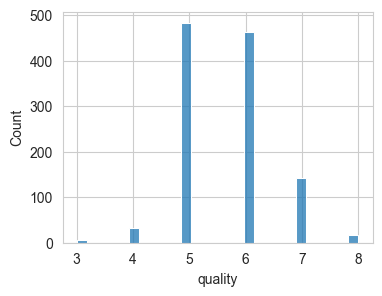

In [21]:
plt.figure(figsize=(4, 3))
sns.histplot(df["quality"]);

### Features

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

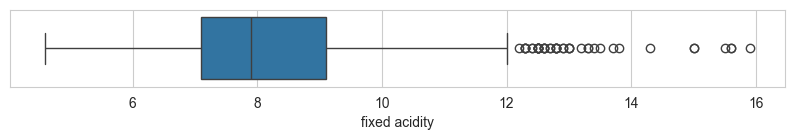

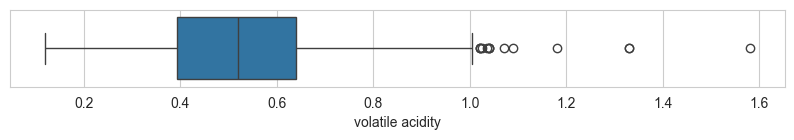

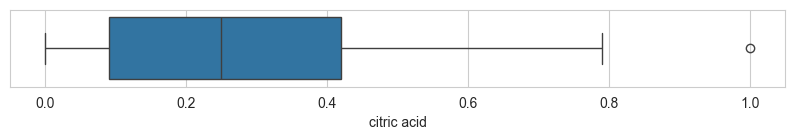

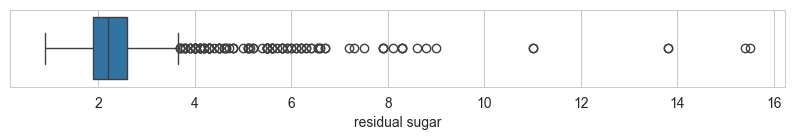

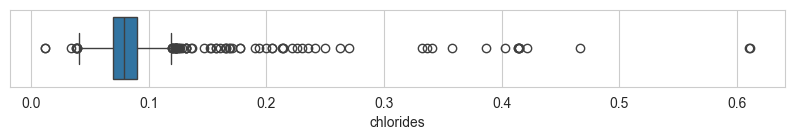

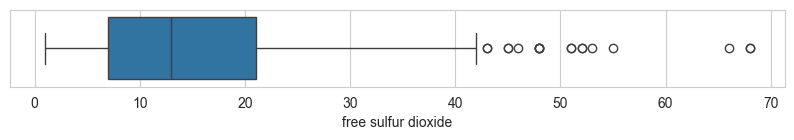

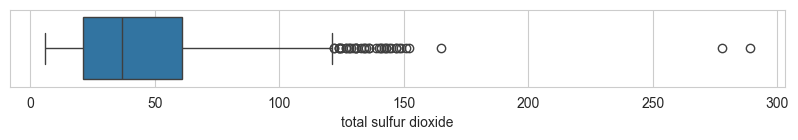

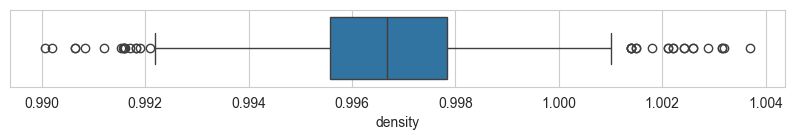

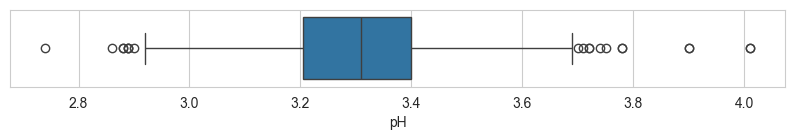

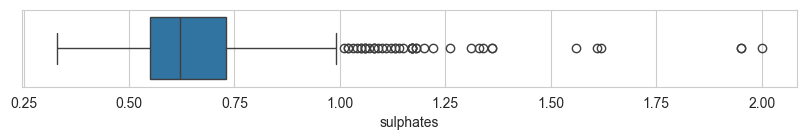

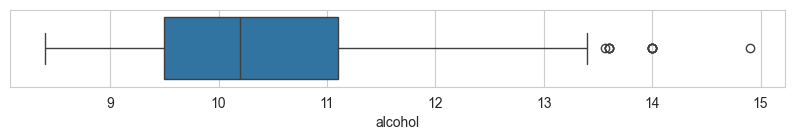

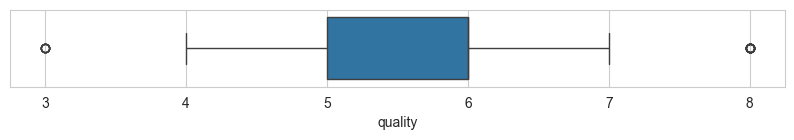

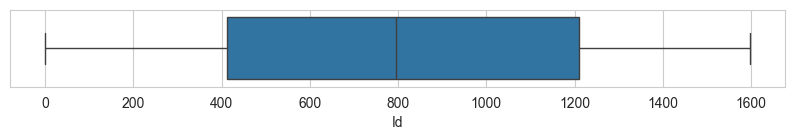

In [30]:
for col in df.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[col])
    plt.show()

## Conclusion

1. Target variable is an ordinal variable with possible values from 0 to 10. In the particular dataset the range is from 3 to 8.

2. To make it a classification problem we should create binary column and treat `quality` either as good or bad, starting from particular point. For example, >6 is good quality wine.

3. All the variables are in different scale, so for some algorithms we should scale data.

4. Column `Id` is copying id, so it is not needed.